# Analysis of Rural Road Infrastructure and Safety for Improvement Prioritization 

**Objective**: Utilize data analysis and machine learning techniques to evaluate the condition and safety of rural road infrastructure. The goal is to identify critical areas where road improvement projects can significantly enhance safety and accessibility.

**Background**: Rural roadways are crucial for the connectivity and economic well-being of rural communities. However, they often receive less attention in terms of maintenance and safety improvements compared to urban roads. This analysis aims to highlight regions where infrastructure improvements could have the most substantial impact on reducing accidents and improving road safety.

**Dataset**: US Road Accident Data. This dataset provides detailed information about road accidents across the United States, including location, severity, environmental conditions, and other relevant factors.

**Suggested Tasks**:

- **Data Analysis and Preprocessing**:
    - Conduct exploratory data analysis to understand the characteristics and patterns of road accidents in rural areas.	Preprocess the data, focusing on rural regions, to prepare it for further analysis.

- **Accident Severity and Frequency Analysis**:
	- Analyze the severity and frequency of accidents on rural roads.
	- Identify factors that contribute to higher accident rates or severity, such as road conditions, visibility, traffic volume, etc.

- **Geographical Analysis**:
	- Utilize GIS data to map accident locations and identify hotspots of high accident frequency or severity in rural areas.
	  Analyze geographical factors that might contribute to these hotspots.

- **Predictive Modeling**:
	- Develop a predictive model to identify areas at higher risk of road accidents.
	  Use machine learning techniques to correlate road conditions and other factors with accident risks.

- **Safety Improvement Recommendations**:
	- Based on the analysis, recommend specific areas where road infrastructure improvements could be most beneficial.


In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df=pd.read_csv(r'US_Accidents_March23_sampled_500k.csv')
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


As we can see there are total of **5,00,000 rows and 46 columns** in our dataset from which **Severity** will be our target variable. Description for each column is as below-

- **ID**-	This is a unique identifier of the accident record.
- **Severity**	Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic  (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
-  **Start_Time**-	Shows start time of the accident in local time zone.
- **End_Time**-	Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
- **Start_Lat**-	Shows latitude in GPS coordinate of the start point.
- **Start_Lng**-	Shows longitude in GPS coordinate of the start point.
- **End_Lat**-	Shows latitude in GPS coordinate of the end point.
- **End_Lng**-	Shows longitude in GPS coordinate of the end point.
- **Distance(mi)**-	The length of the road extent affected by the accident.
- **Description**-	Shows natural language description of the accident.
- **Number**-	Shows the street number in address field.
- **Street**-	Shows the street name in address field.
- **Side**-	Shows the relative side of the street (Right/Left) in address field.
- **City**-	Shows the city in address field.
- **County**-	Shows the county in address field.
- **State**-Shows the state in address field.
- **Zipcode**-	Shows the zipcode in address field.
- **Country**-	Shows the country in address field.
- **Timezone**-	Shows timezone based on the location of the accident (eastern, central, etc.).
- **Airport_Code**-	Denotes an airport-based weather station which is the closest one to location of the accident.
- **Weather_Timestamp**-	Shows the time-stamp of weather observation record (in local time).
- **Temperature(F)**-	Shows the temperature (in Fahrenheit).
- **Wind_Chill(F)**-	Shows the wind chill (in Fahrenheit).
- **Humidity(%)**-	Shows the humidity (in percentage).
- **Pressure(in)**-	Shows the air pressure (in inches).
- **Visibility(mi)**-	Shows visibility (in miles).
- **Wind_Direction**-	Shows wind direction.
- **Wind_Speed(mph)**-	Shows wind speed (in miles per hour).
- **Precipitation(in)**-	Shows precipitation amount in inches, if there is any.
- **Weather_Condition**-	Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
- **Amenity**-	A POI annotation which indicates presence of amenity in a nearby location.
- **Bump**-	A POI annotation which indicates presence of speed bump or hump in a nearby location.
- **Crossing**-	A POI annotation which indicates presence of crossing in a nearby location.
- **Give_Way**-	A POI annotation which indicates presence of give_way in a nearby location.
- **Junction**-	A POI annotation which indicates presence of junction in a nearby location.
- **No_Exit**-	A POI annotation which indicates presence of no_exit in a nearby location.

- **Railway**- A POI annotation which indicates presence of railway in a nearby location.

- **Roundabout**-	A POI annotation which indicates presence of roundabout in a nearby location.
- **Station**-	A POI annotation which indicates presence of station in a nearby location.
- **Stop**-	A POI annotation which indicates presence of stop in a nearby location.
- **Traffic_Calming**-	A POI annotation which indicates presence of traffic_calming in a nearby location.
- **Traffic_Signal**-	A POI annotation which indicates presence of traffic_signal in a nearby loction.
- **Turning_Loop**-	A POI annotation which indicates presence of turning_loop in a nearby location.
- **Sunrise_Sunset**-	Shows the period of day (i.e. day or night) based on sunrise/sunset
- **Civil_Twilight**-	Shows the period of day (i.e. day or night) based on civil twilight.
- **Nautical_Twilight**-Shows the period of day (i.e. day or night) based on nautical twilight.
- **Astronomical_Twilight**-Shows the period of day (i.e. day or night) based on astronomical twilight.





In [4]:
df.duplicated().sum()

0

There are no duplicated values present in our dataset.

In [5]:
df.nunique()

ID                       500000
Source                        3
Severity                      4
Start_Time               487027
End_Time                 493821
Start_Lat                368965
Start_Lng                370195
End_Lat                  220333
End_Lng                  221463
Distance(mi)              10627
Description              408146
Street                    88272
City                       9488
County                     1606
State                        49
Zipcode                  127804
Country                       1
Timezone                      4
Airport_Code               1878
Weather_Timestamp        255623
Temperature(F)              712
Wind_Chill(F)               797
Humidity(%)                 100
Pressure(in)                980
Visibility(mi)               65
Wind_Direction               24
Wind_Speed(mph)              95
Precipitation(in)           175
Weather_Condition           108
Amenity                       2
Bump                          2
Crossing

From above we can see the number of unique values present in each column. As it is a data of rural and urban combined and our main aim is to evaluate the conditions and safety of rural road infrastructure, and as we dont have the specifics or columns from which we can infer what states or what cities come under rural areas, so I have used the **US 2010 and 2020 Rural Census** to find the states with the most rural population and we see that there are total of **49 states** in our dataset so we will be using **states with atleast 30% rural areas(20 states in total)** so there are to identify the conditions and patterns of accidents which we can use to enhance the safety and accessibility of rural areas and also apply those methods and techniques to states with lower rural population.

Link for the sources-
1) https://mtgis-portal.geo.census.gov/arcgis/apps/storymaps/collections/189aa1dbd64c4c81b3b4a2b71124f6c6?item=1
2) https://worldpopulationreview.com/state-rankings/most-rural-states

In [6]:
selected_states = ['AK', 'WY','MT','ND','SD','NM','ME','ID','VT','WV','MS','AR','AL','NH','KY','IA','OK','TN','NC','WI','SC']
df_rural = df[df['State'].isin(selected_states)]
df_rural.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
11,A-4908440,Source1,2,2022-02-01 04:13:55,2022-02-01 07:05:30,47.258259,-115.052916,47.283369,-115.077806,2.091,...,False,False,False,False,False,False,Night,Night,Night,Night
12,A-1388988,Source2,2,2020-07-16 11:03:31,2020-07-16 13:17:35,34.720150,-86.616592,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
20,A-3086025,Source2,3,2018-01-25 11:30:19,2018-01-25 12:14:33,35.753944,-78.635696,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
22,A-674983,Source2,2,2022-03-16 15:15:36,2022-03-16 15:44:24,34.651295,-86.816582,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
23,A-674620,Source2,2,2022-03-16 18:56:36,2022-03-16 19:26:44,34.037140,-81.090858,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


So this will be our dataset of the most rural states. It has 83274 rows and 46 columns.

In [7]:
df_rural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83274 entries, 11 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     83274 non-null  object 
 1   Source                 83274 non-null  object 
 2   Severity               83274 non-null  int64  
 3   Start_Time             83274 non-null  object 
 4   End_Time               83274 non-null  object 
 5   Start_Lat              83274 non-null  float64
 6   Start_Lng              83274 non-null  float64
 7   End_Lat                36834 non-null  float64
 8   End_Lng                36834 non-null  float64
 9   Distance(mi)           83274 non-null  float64
 10  Description            83274 non-null  object 
 11  Street                 83184 non-null  object 
 12  City                   83272 non-null  object 
 13  County                 83274 non-null  object 
 14  State                  83274 non-null  object 
 15  

- From above we notice that we have float, object and boolean type of columns in our dataset. Also we can notice that some columns have minimal null values which we can just drop but **End_Lat and End_Lang, Wind_chill and Precipitation(in)** have major null values and thus need **imputation.**

- After carefully analysing the above dataset and the file provided to us in excel, I have noticed that **Wind_Chill(F) was somewhat equal to the Temperature** column in most of the cases so we can use the latter to **fill the null valus** in the former. 
- Similarly, **Start_Lat and Start_lang can also be used to fill the null values in End_lat and End_Lang** as they are somewhat the same as after any incident there is not much of a difference in where the accident happens and till where the accident's effects reaches. We could have also used the distance column to find the null alues of end latitute and longitude but as we dont know the direction of the extent of the accident, it wont be possible to use it.

- And finally for the **Precipitation** column we will use **median of precipitation during each weather_conditions** to fill the null values.

### Imputation of null values

In [8]:
new_df_rural = df_rural.copy()
new_df_rural['End_Lat'] = new_df_rural['End_Lat'].fillna(new_df_rural['Start_Lat'])
new_df_rural['End_Lng'] = new_df_rural['End_Lng'].fillna(new_df_rural['Start_Lng'])
new_df_rural['Wind_Chill(F)'] = new_df_rural['Wind_Chill(F)'].fillna(new_df_rural['Temperature(F)'])

In [9]:
new_df_rural['Precipitation(in)'] = df_rural.groupby('Weather_Condition')['Precipitation(in)'].transform(lambda x: x.fillna(x.median()))

In [10]:
new_df_rural.isna().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                     0
End_Lng                     0
Distance(mi)                0
Description                 0
Street                     90
City                        2
County                      0
State                       0
Zipcode                     3
Country                     0
Timezone                  235
Airport_Code              282
Weather_Timestamp         884
Temperature(F)           1088
Wind_Chill(F)            1088
Humidity(%)              1164
Pressure(in)              985
Visibility(mi)           1181
Wind_Direction           1216
Wind_Speed(mph)          5580
Precipitation(in)        1220
Weather_Condition        1215
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

We can confirm from above that most of the null values have been treated and imputed as we inteded to. Now we will remove these null values as these are very minimal as compared to the data we have in total.

### Removing unnecessary null values

In [11]:
new_df_rural1=new_df_rural.dropna()
print ("Shape of the dataframe before removing null values:",new_df_rural.shape) 
print ("Shape of the dataframe after removing null values:",new_df_rural1.shape) 
print ("Data loss post removal of null values:",((new_df_rural.shape[0]-new_df_rural1.shape[0])/new_df_rural.shape[0]*100),'%')

Shape of the dataframe before removing null values: (83274, 46)
Shape of the dataframe after removing null values: (76762, 46)
Data loss post removal of null values: 7.819967817085765 %


As the dataloss is below the thumb rule of 10%, we will continue with this dataset having 76762 rows and 46 columns.

In [12]:
#Converting the start time column to year, month , day and hour columns. We are not conerting any other datetime column as we will be dropping other datetime column.
new_df_rural1['Start_Time'] = pd.to_datetime(new_df_rural1['Start_Time'], format='%Y-%m-%d %H:%M:%S')
new_df_rural1['Month'] = new_df_rural1['Start_Time'].dt.month
new_df_rural1['Year'] = new_df_rural1['Start_Time'].dt.year
new_df_rural1['Day'] = new_df_rural1['Start_Time'].dt.day
new_df_rural1['Hour'] = new_df_rural1['Start_Time'].dt.hour

In [13]:
new_df_rural1.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,76762.0,2.165655,0.465362,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,76762.0,35.839194,2.944577,30.310652,34.510769,35.213245,36.039124,48.991585
Start_Lng,76762.0,-85.122971,7.512507,-117.033257,-86.809982,-82.287872,-80.779825,-67.484130
End_Lat,76762.0,35.839402,2.944800,30.302528,34.511058,35.213341,36.039066,48.998901
End_Lng,76762.0,-85.123016,7.512736,-117.004754,-86.810881,-82.288433,-80.779922,-67.484130
Distance(mi),76762.0,0.495650,1.722701,0.000000,0.000000,0.000000,0.275000,112.968000
Temperature(F),76762.0,61.786695,18.835413,-29.000000,48.000000,64.000000,76.000000,196.000000
Wind_Chill(F),76762.0,60.570484,20.944521,-52.000000,48.000000,64.000000,76.000000,196.000000
Humidity(%),76762.0,66.424207,22.296146,4.000000,48.000000,68.000000,87.000000,100.000000
Pressure(in),76762.0,29.432367,0.887755,19.520000,29.210000,29.570000,29.950000,30.900000


From above we find the following details about numerical columns in our dataset-
1) **Mean, Median(50%),Standard Deiation, IQR, Minimum and Maximum** values for each column
2) Data may be **skewed** for some columns as Mean and Median have somewhat different values, which we will check in later stage.
3) There are **outliers present** as 75% and max values have a huge gap in some columns, which we will again comfirm again in later stages using boxplot.

In [14]:
new_df_rural1.describe(include='O').T

,count,unique,top,freq
ID,76762,76762,A-4908440,1
Source,76762,3,Source2,41170
End_Time,76762,76257,2021-11-22 08:00:00,10
Description,76762,65196,The road is closed.,38
Street,76762,20175,I-40 W,1046
City,76762,2515,Charlotte,8273
County,76762,620,Mecklenburg,8657
State,76762,20,SC,22560
Zipcode,76762,28312,29210,403
Country,76762,1,US,76762


From above we find the following inferences-
1) **Most accidents** have been described where the **road was closed**.
2) **I-40 W** street is the street with the **most (1046) accidents**.
3) **City Charlotte** is the city with the **most (8273) accidents**.
4) **Mecklenburg County** is the County with the **most(8657) accidents**.
5) **South Carolina** is the state with the **most (22560) accidents**.
6) **Most accidents** have been recorded during the **Day** with **Fair** weather conditions.

In [15]:
new_df_rural1.describe(include='boolean').T

,count,unique,top,freq
Amenity,76762,2,False,75971
Bump,76762,2,False,76747
Crossing,76762,2,False,66620
Give_Way,76762,2,False,76359
Junction,76762,2,False,73213
No_Exit,76762,2,False,76509
Railway,76762,2,False,76125
Roundabout,76762,2,False,76759
Station,76762,2,False,75617
Stop,76762,2,False,74538


From above we find that majority of the accidents have happened where there are absence of important traffic control features.

### Dropping unnecessary columns

In [16]:
new_df_rural1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Month', 'Year', 'Day', 'Hour'],
      dtype='object')

For our Visualisation and ML models, columns like ID, Source, Start_time(as we have already conerted in), End_time, End latitude and longitude(as we have the start ones) , Distance, Description (too many unique values), Street(too many unique values), County (as we already have city and state) , Zipcode, Country, Timezone, Airport_code, Weather_timestamp, Windchill (as we have temperature and they are almost equal in every row),  and Turning loop(it only has false value)are of no use, so we will be dropping these columns. 

In [17]:
new_df_rural1.drop(columns=['ID','Source','Start_Time','End_Time','End_Lat','End_Lng','Distance(mi)','Description','Street','County','Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp','Wind_Chill(F)','Turning_Loop'],inplace=True)

In [18]:
#splitting the columns as per their datatype
float_cols=[]
for i in new_df_rural1.dtypes.index:
    if new_df_rural1.dtypes[i]=='float':
        float_cols.append(i)
    
obj_cols = []
for x in new_df_rural1.dtypes.index:
    if new_df_rural1.dtypes[x] == 'object':
        obj_cols.append(x)
    
bool_cols=[]
for x in new_df_rural1.dtypes.index:
    if new_df_rural1.dtypes[x]=='bool':
        bool_cols.append(x)

date_cols=['Hour','Day','Month','Year']

print('float columns are=',float_cols,'\n')
print('Object columns are=',obj_cols,'\n')
print('Bool columns are=',bool_cols,'\n')
print('Date columns are=',date_cols)

float columns are= ['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'] 

Object columns are= ['City', 'State', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'] 

Bool columns are= ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'] 

Date columns are= ['Hour', 'Day', 'Month', 'Year']


## Visualisation

### Severity distribution

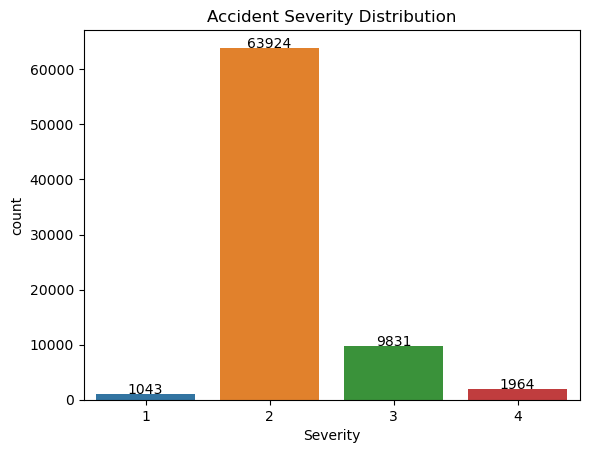

In [19]:
#Firstly ananlysisng the distribution of severity-
ax=sns.countplot(x='Severity', data=new_df_rural1)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Accident Severity Distribution')
plt.show()

From the above graph we can see that **majority (around 80%) cases are of 2 level of severity**, followed by 3rd, 4th and lastly 1st in the rural areas.

### Area wise

Now we will be checking how the accidents are distributed among different cities and states to find the most accident prone areas.

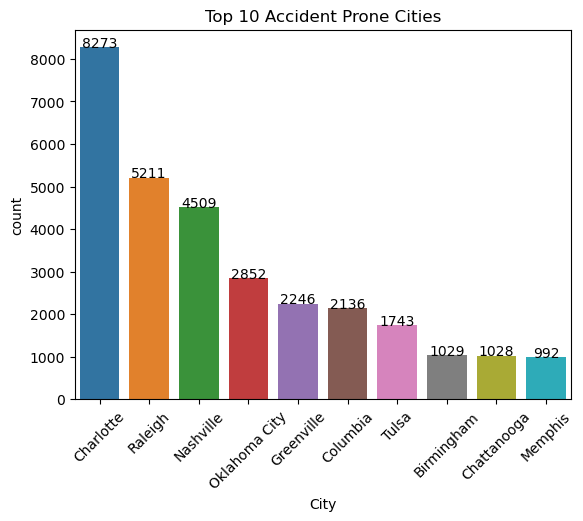

In [20]:
#As there are total of 2515 cities we will be filtering the data for top 10 most accident prone cities
top_cities = new_df_rural1['City'].value_counts().head(10).index

new_df_rural1_top_cities = new_df_rural1[new_df_rural1['City'].isin(top_cities)]

ax=sns.countplot(x='City', data=new_df_rural1_top_cities, order=top_cities)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Top 10 Accident Prone Cities')

plt.xticks(rotation=45)
plt.show()

We can clearly see from the above graph that **Charlotte is the city with the most accidents followed by Raleigh and Nashville**.

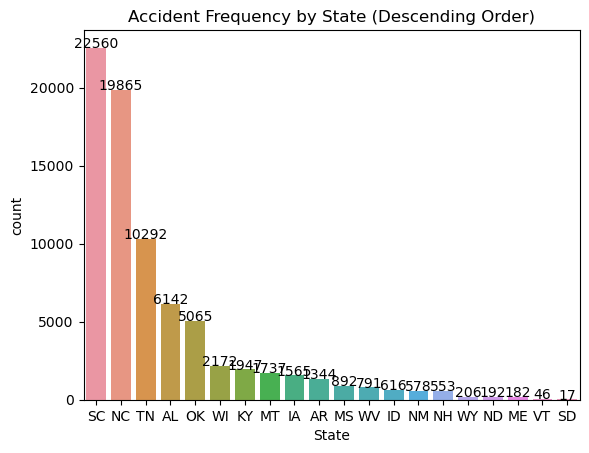

In [21]:
#Analysing and visualising to check for the most accident prone States

state_counts = new_df_rural1['State'].value_counts()

ax=sns.countplot(x='State', data=new_df_rural1, order=state_counts.index)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Accident Frequency by State (Descending Order)')
plt.show()

From aboe we notice that **South Carolina is the state with the most accidents** followed by North Carolina and Tennessee.

### Temporal Analysis

Text(0.5, 1.0, 'Year-Wise Accident Distribution')

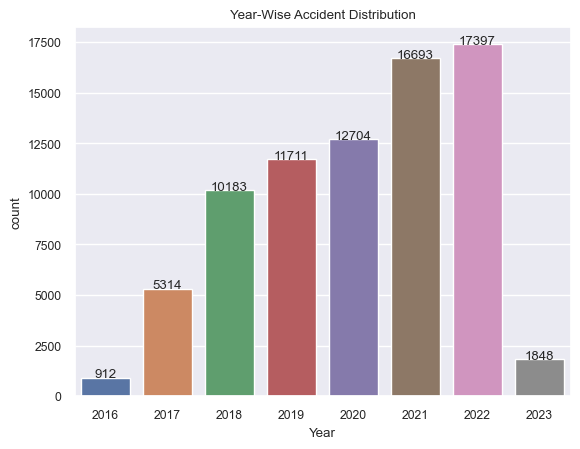

In [22]:
#Year wise distribution
sns.set(font_scale=0.8)
ax=sns.countplot(data=new_df_rural1, x='Year', label='D KDE')
for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Year-Wise Accident Distribution')

We notice that **accidents are continuously rising with time** and there is a **huge jump from 2020 to 2021** and as we have data till April of 2023 so we cant find the growth from 2022 to 2023 but we can safely say that accidents are icreasing with time which is an alarming result.

Text(0.5, 1.0, 'Month-Wise Accident Distribution')

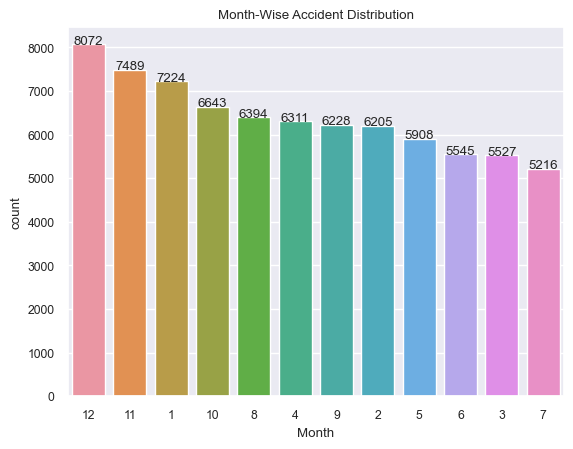

In [23]:
#Month wise distribution
month_counts = new_df_rural1['Month'].value_counts()
ax=sns.countplot(data=new_df_rural1, x='Month', order=month_counts.index)
for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Month-Wise Accident Distribution')

From aboe we notice that **most accidents** occur during the cold months of **November to January** with most in December.

Text(0.5, 1.0, 'Date-Wise Accident Distribution')

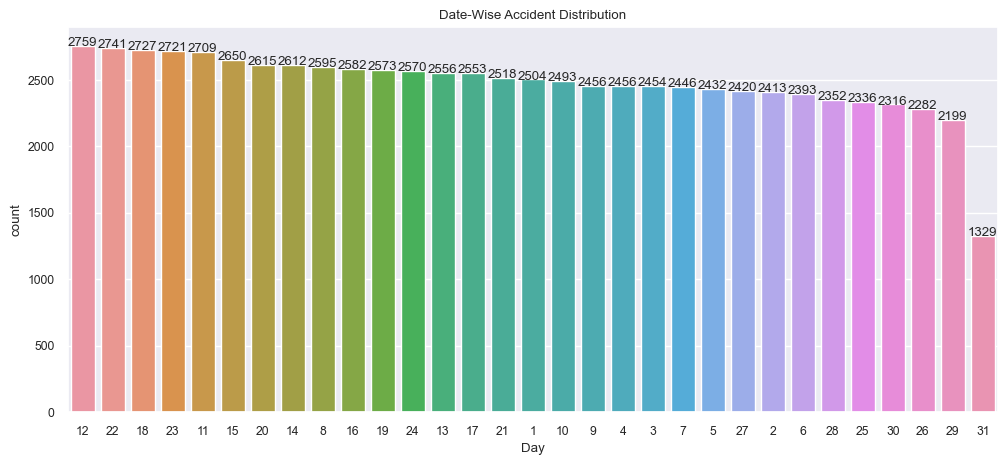

In [24]:
#Date wise distribution
plt.figure(figsize=(12,5))
date_counts = new_df_rural1['Day'].value_counts()
ax=sns.countplot(data=new_df_rural1, x='Day', order=date_counts.index)
for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Date-Wise Accident Distribution')

We cannot find any particular trend with days and accidents so there are no underlying pattern between the two except there are considerably less accidents on 31st which may be due to some months having only 30 days.

Text(0.5, 1.0, 'Date-Wise Accident Distribution')

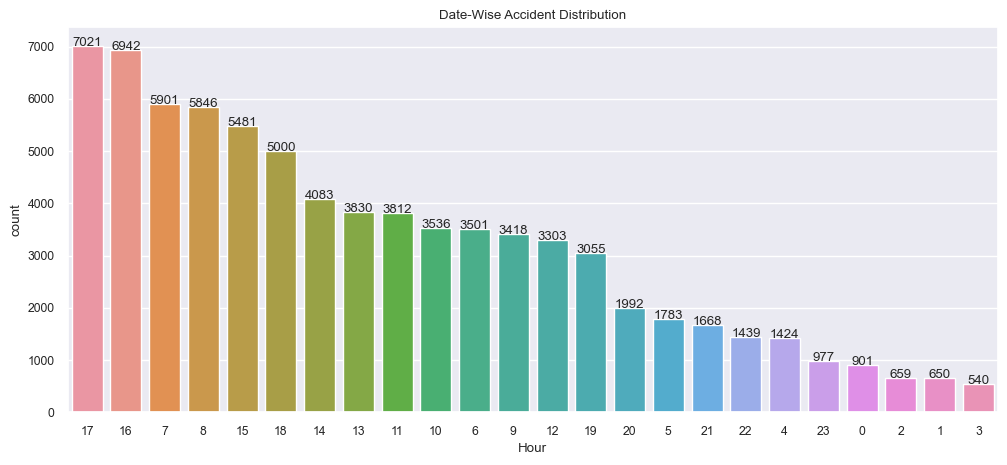

In [25]:
plt.figure(figsize=(12,5))
hr_counts = new_df_rural1['Hour'].value_counts()
ax=sns.countplot(data=new_df_rural1, x='Hour', order=hr_counts.index)
for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Date-Wise Accident Distribution')

We can notice that most of the accidents occur between the rush hours of 4-5 PM and 7-8 AM, while there are very less accidents during the late hours of 11 PM -3 AM.

### Visualising numerical factors

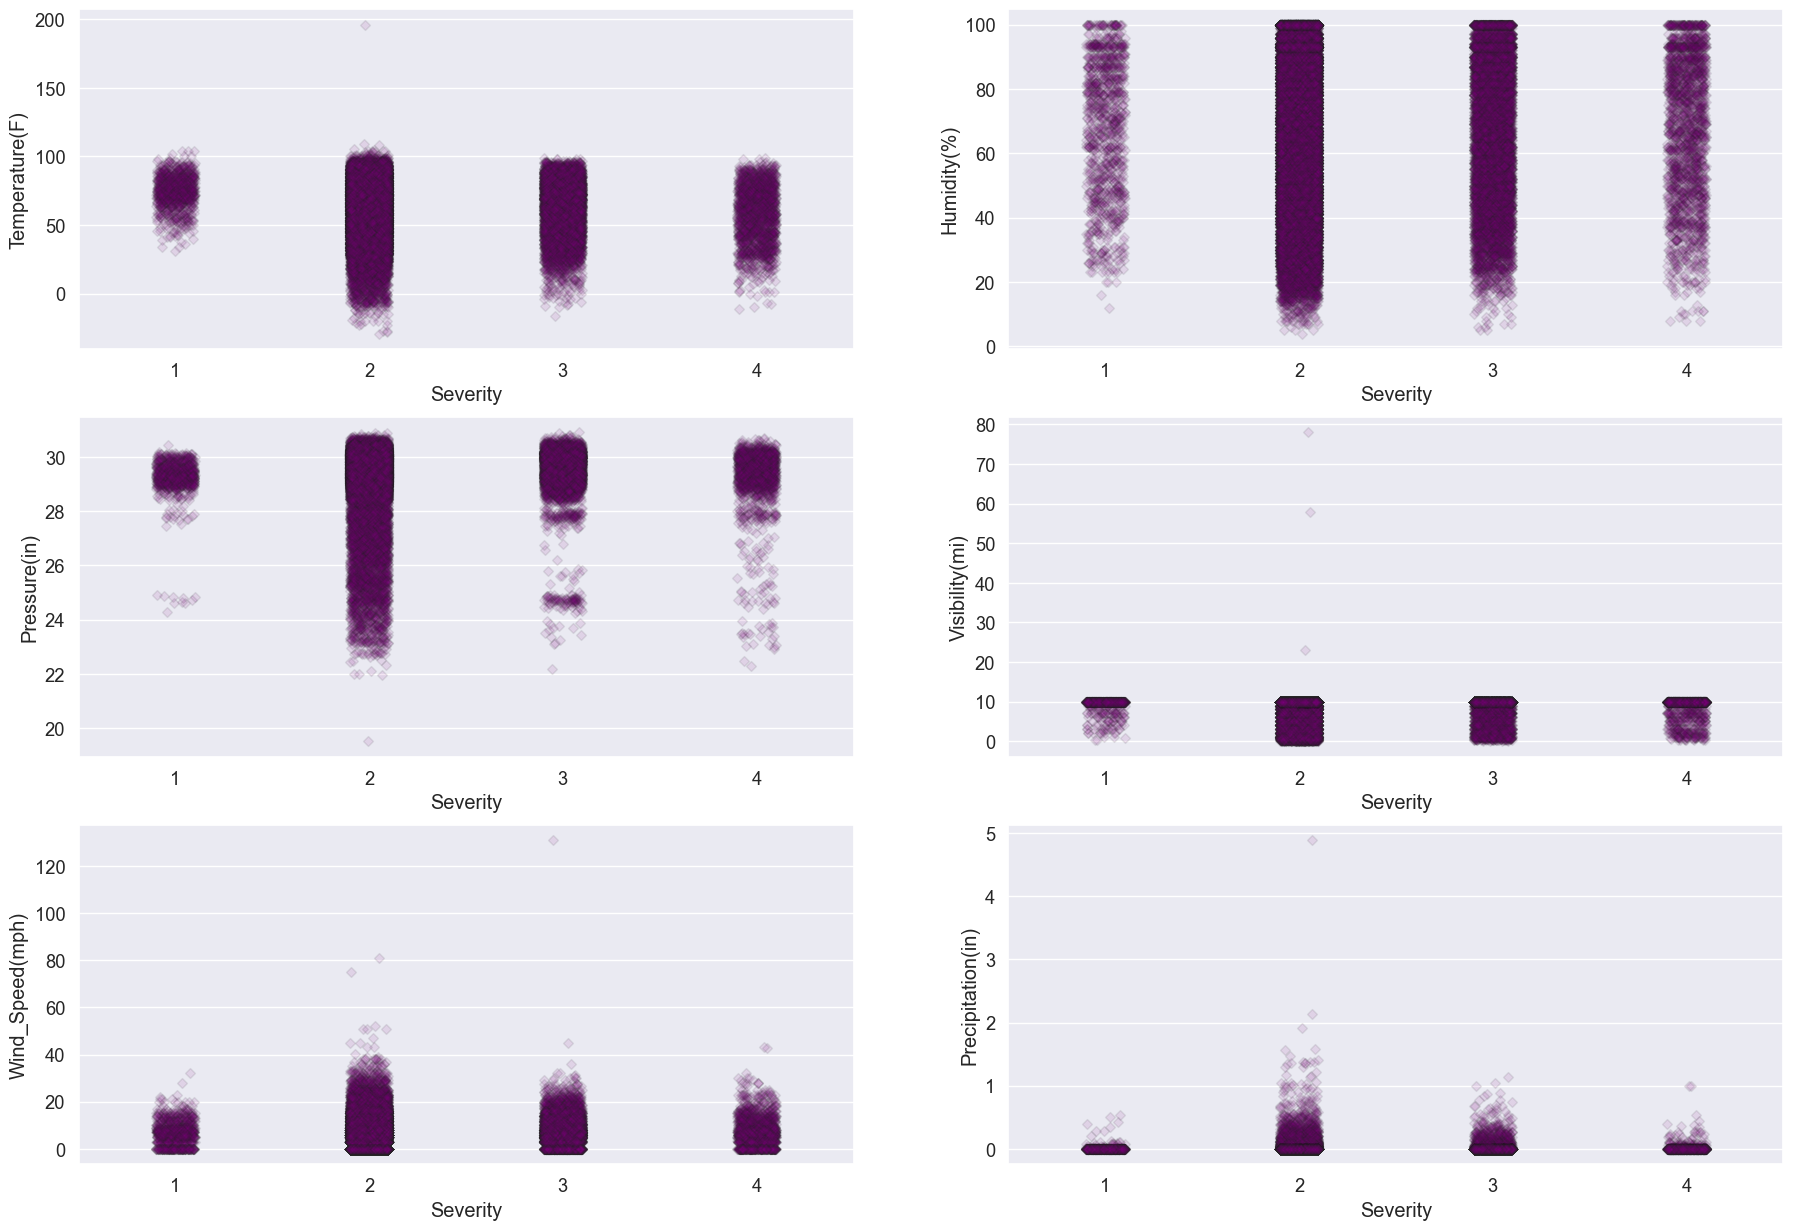

In [26]:
#now checking how other factors are responsible for most accidents
plt.figure(figsize=(22,15))
sns.set(font_scale=1.2)
p=1
for i in float_cols[2:]:
    if p<=6:
        ax=plt.subplot(3,2,p)
        sns.stripplot(y=new_df_rural1[i],x='Severity',data=new_df_rural1, s=5, marker="D", linewidth=1, alpha=.1,color='purple')
    p+=1
plt.show()

From above we infer that-
1) As the **temperature decreases, frequency and severity of accidents also increases**.
2) With **decrease in pressure , frequency and severity of accidents increases.**
3) **Accidents of 2nd and 3rd level** of severity happens the most when there is **less humidity**
4) There is definitely a relation between visibility and severity of accidents as we can clearly see as the **visibility decreases frequency as well as severity also increases**.
5) There is somewhat a **positive relation between windspeed and frequency of the accidents** as well.
6) There is an **increase in severity and frequency of accidents as precipitation increases**.

### Visualising traffic control features (Boolean Features)

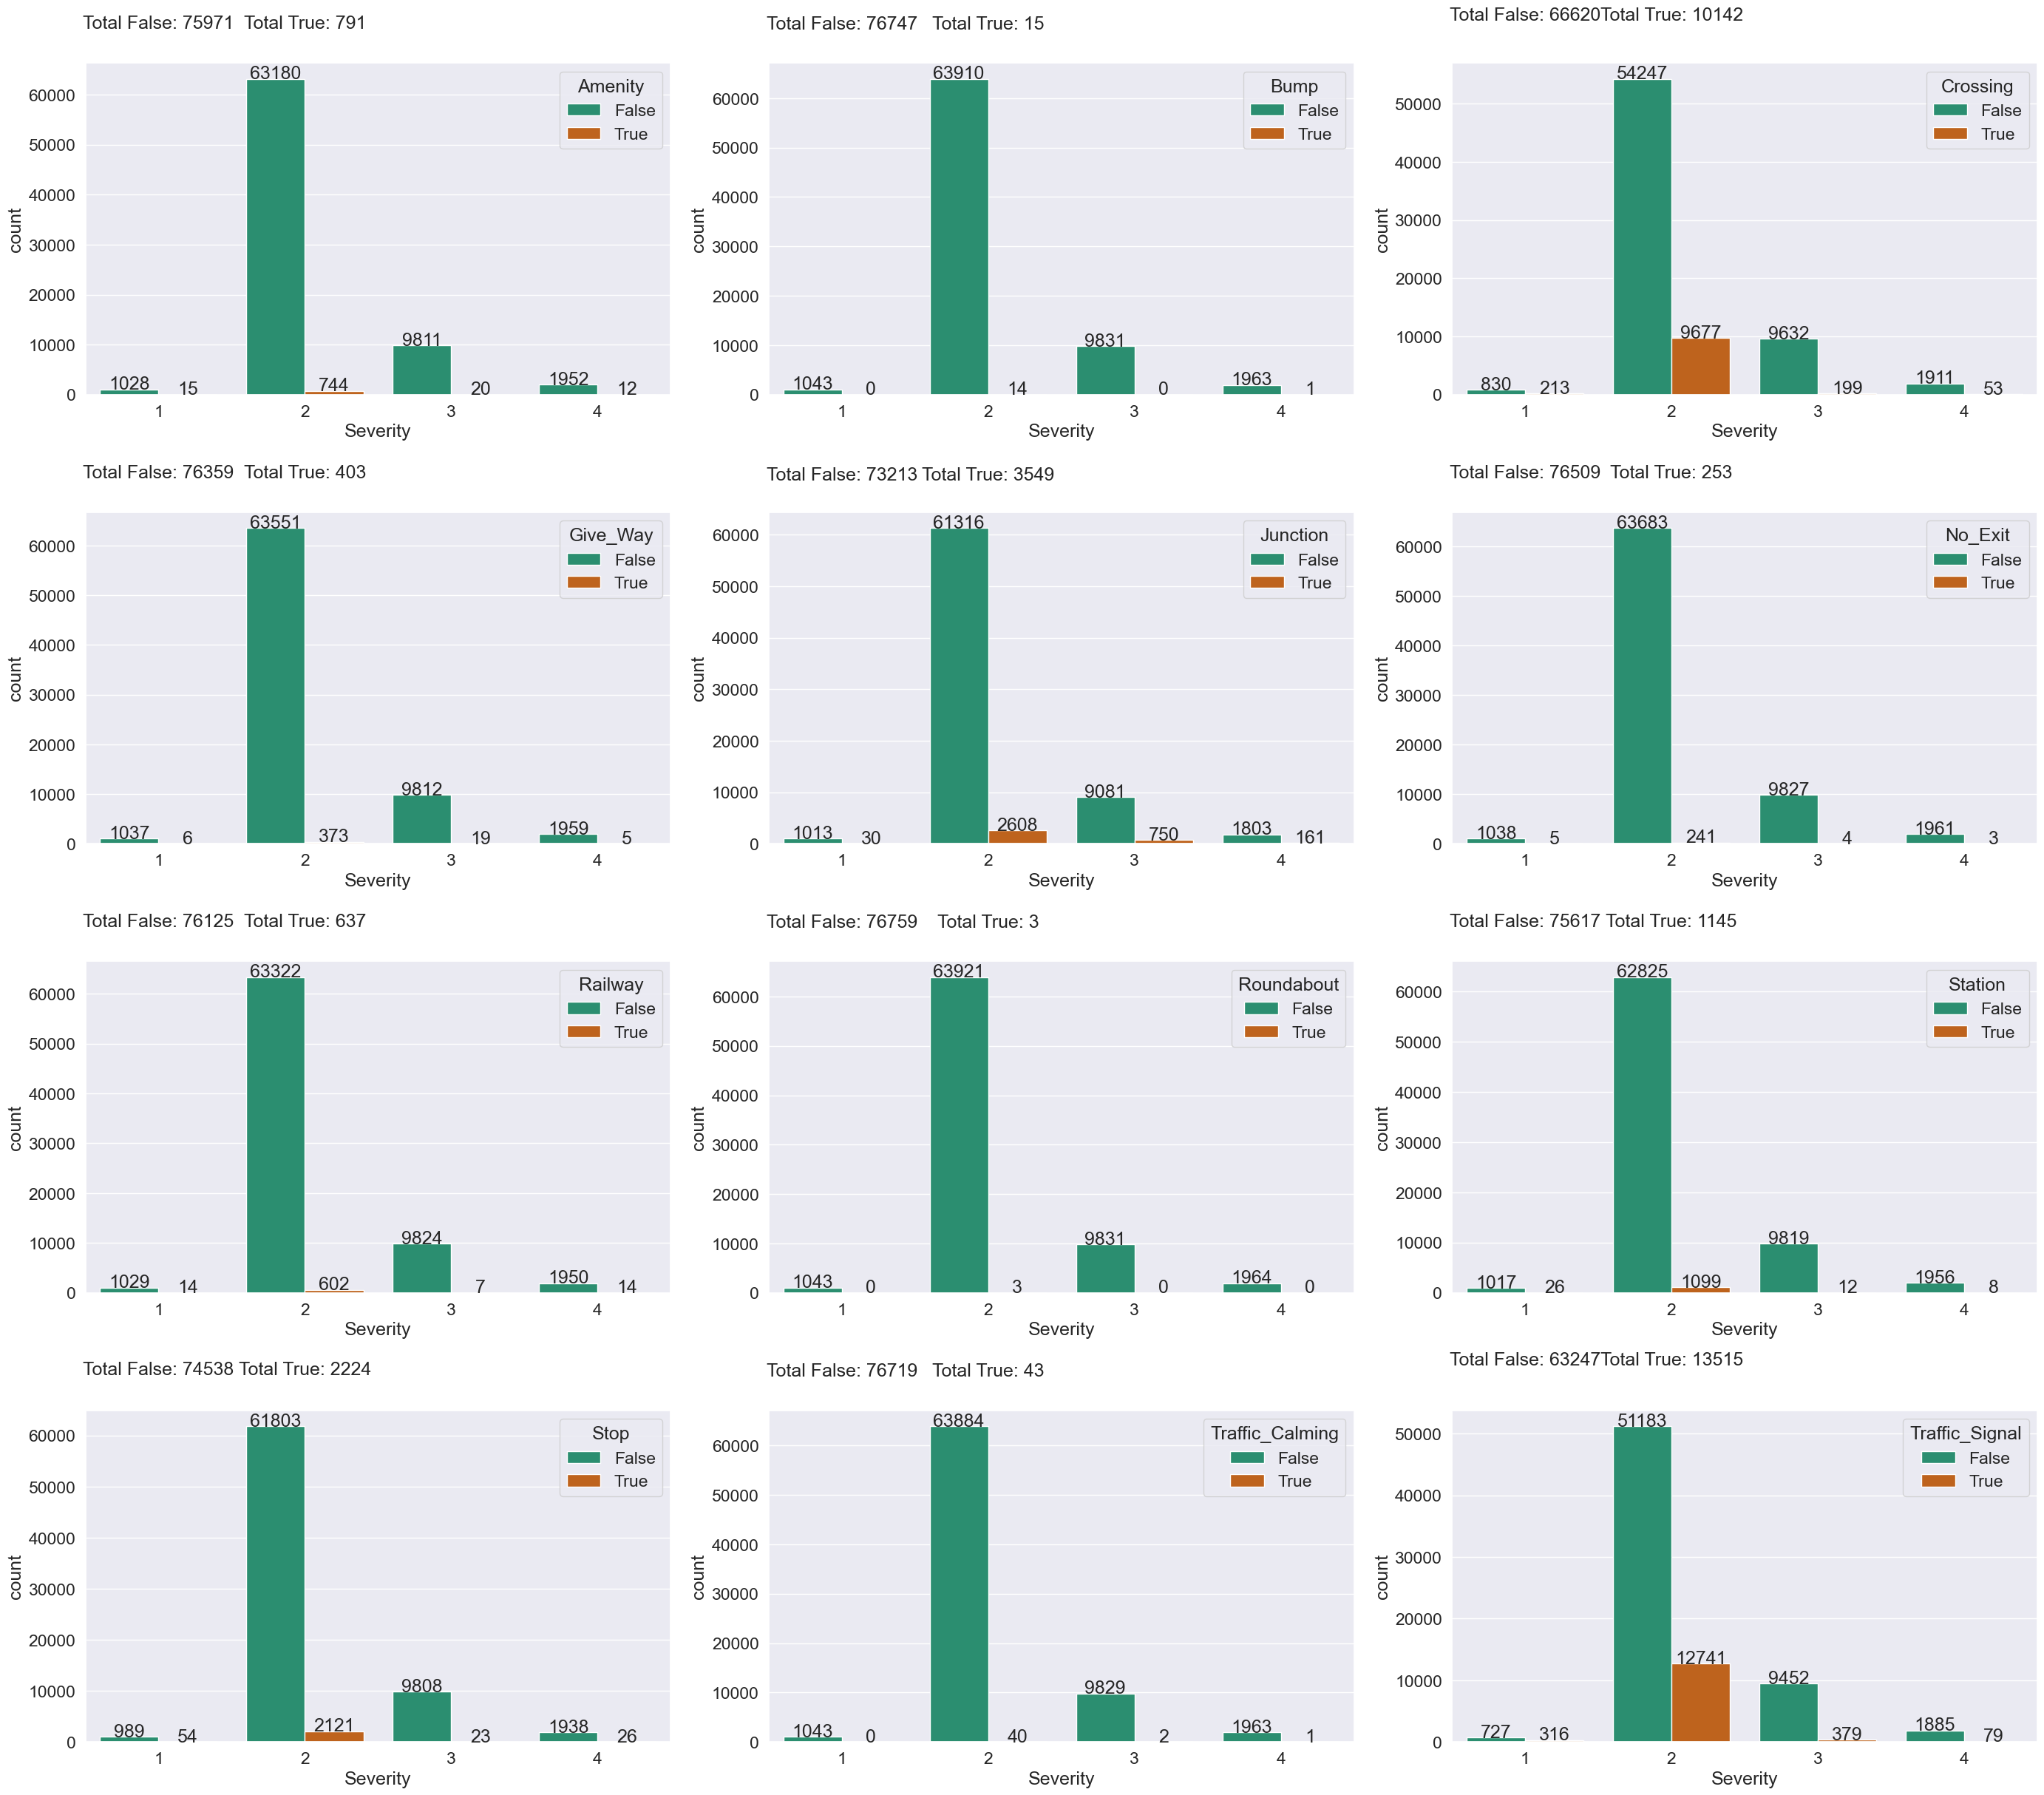

In [27]:
plt.figure(figsize=(28,30))
sns.set(font_scale=1.5)
p=1
for i in bool_cols:
    if p<=15:
        ax=plt.subplot(5,3,p)
        sns.countplot(x='Severity',hue=i,data=new_df_rural1,palette='Dark2')
        for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
            
        total_counts = new_df_rural1.groupby(i)['Severity'].count()
        max_count = max(total_counts)
        for j, (hue_category, count) in enumerate(total_counts.items()):
            ax.text(j, max_count + 0.1, f'Total {hue_category}: {count}', ha='center', va='top',fontsize=18)
        
    p+=1
plt.tight_layout()

From above graphs we infer the following about the traffic control techniques/features-
1) We can see that **most of the features are lacking** in the rural areas except presence of some Traffic Signals and Crossings.
2) We can notice from the total count of true that **bump, Roundabout and Traffic Calming** have been able to **decrease the level and frequency of accidents effectively**, and wherever the are not present there have been the most accidents.
3) **Crossing and Traffic signals** are **not enough** for accident control alone as even if they are present there have been a lot of accidents.
4) **Junction** is responsible for the **most number of 3rd and 4th level of severity accidents** as compared to other features.

### Visualising Categorical columns

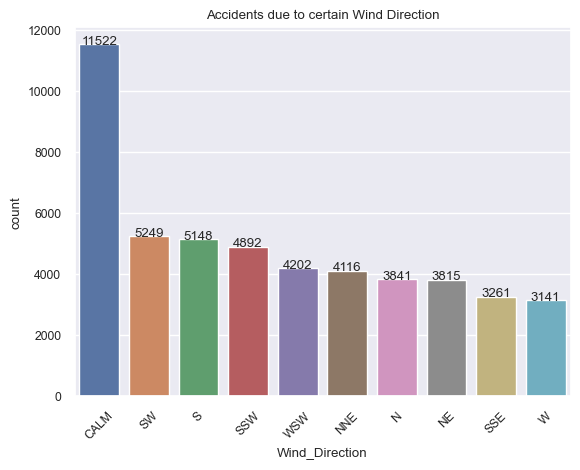

In [28]:
#Visualising categorical features like wind direction, weather conditions, etc
sns.set(font_scale=0.8)
top = new_df_rural1['Wind_Direction'].value_counts().head(10).index

top_wd = new_df_rural1[new_df_rural1['Wind_Direction'].isin(top)]

ax=sns.countplot(x='Wind_Direction', data=top_wd, order=top)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Accidents due to certain Wind Direction')
plt.xticks(rotation=45)
plt.show()

We notice that most accidents have happened during **Calm Wind**.

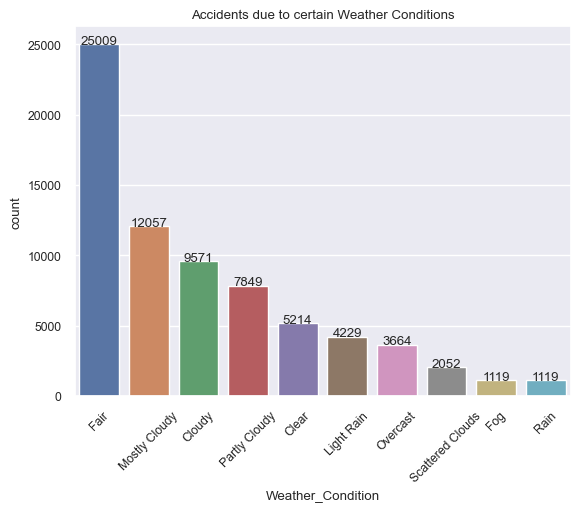

In [29]:
top1 = new_df_rural1['Weather_Condition'].value_counts().head(10).index

top_wc = new_df_rural1[new_df_rural1['Weather_Condition'].isin(top1)]

ax=sns.countplot(x='Weather_Condition', data=top_wc, order=top1)
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}',ha='center')
plt.title('Accidents due to certain Weather Conditions')
plt.xticks(rotation=45)
plt.show()

Most accidents have happened during **Fair weather conditons**.

## Geographical Analysis using GIS data 

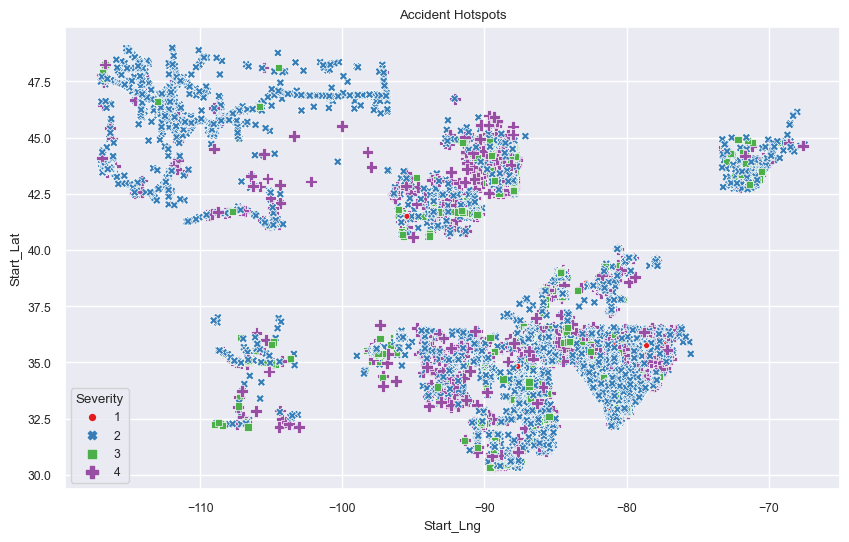

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity',style='Severity',size='Severity',data=new_df_rural1,palette='Set1')
plt.title('Accident Hotspots')
plt.show()

This graph shows the **distribution of accidents with different level of severity in the US**. We will be integrating the insights from this graph with the below one to find the exact hotsopts for different level of severity in accidents.

In [31]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

In [32]:
map_center = [new_df_rural1['Start_Lat'].mean(), new_df_rural1['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)


marker_cluster = MarkerCluster().add_to(accident_map)


for index, row in new_df_rural1.iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']], 
                  popup=f"Severity: {row['Severity']}",
                  icon=None).add_to(marker_cluster)

In [33]:
accident_map.save("accident_map.html") 

In [15]:
from IPython.display import IFrame

IFrame(src='./accident_map.html', width=700, height=600)

This graph shows the **distribution of frequency of the accidents in the US**.
After integrating the insights from both the graphs we notice that-
- **Major number of accidents** are occurring in the South Eastern states like **South Carolina North Carolina and Tenesse**.
- **Major hotspot for 4 level of severity** accidents are in **Chicago and Southern states like Oklahama and South Carolina**.
- While states in the north like **Montana and North Dakota are most likely to register less accidents and mostly of 2nd level severity**.
- We can further zoom in and find the major cities and areas to find the local hotspots.

### Finding Correlation 

<Axes: >

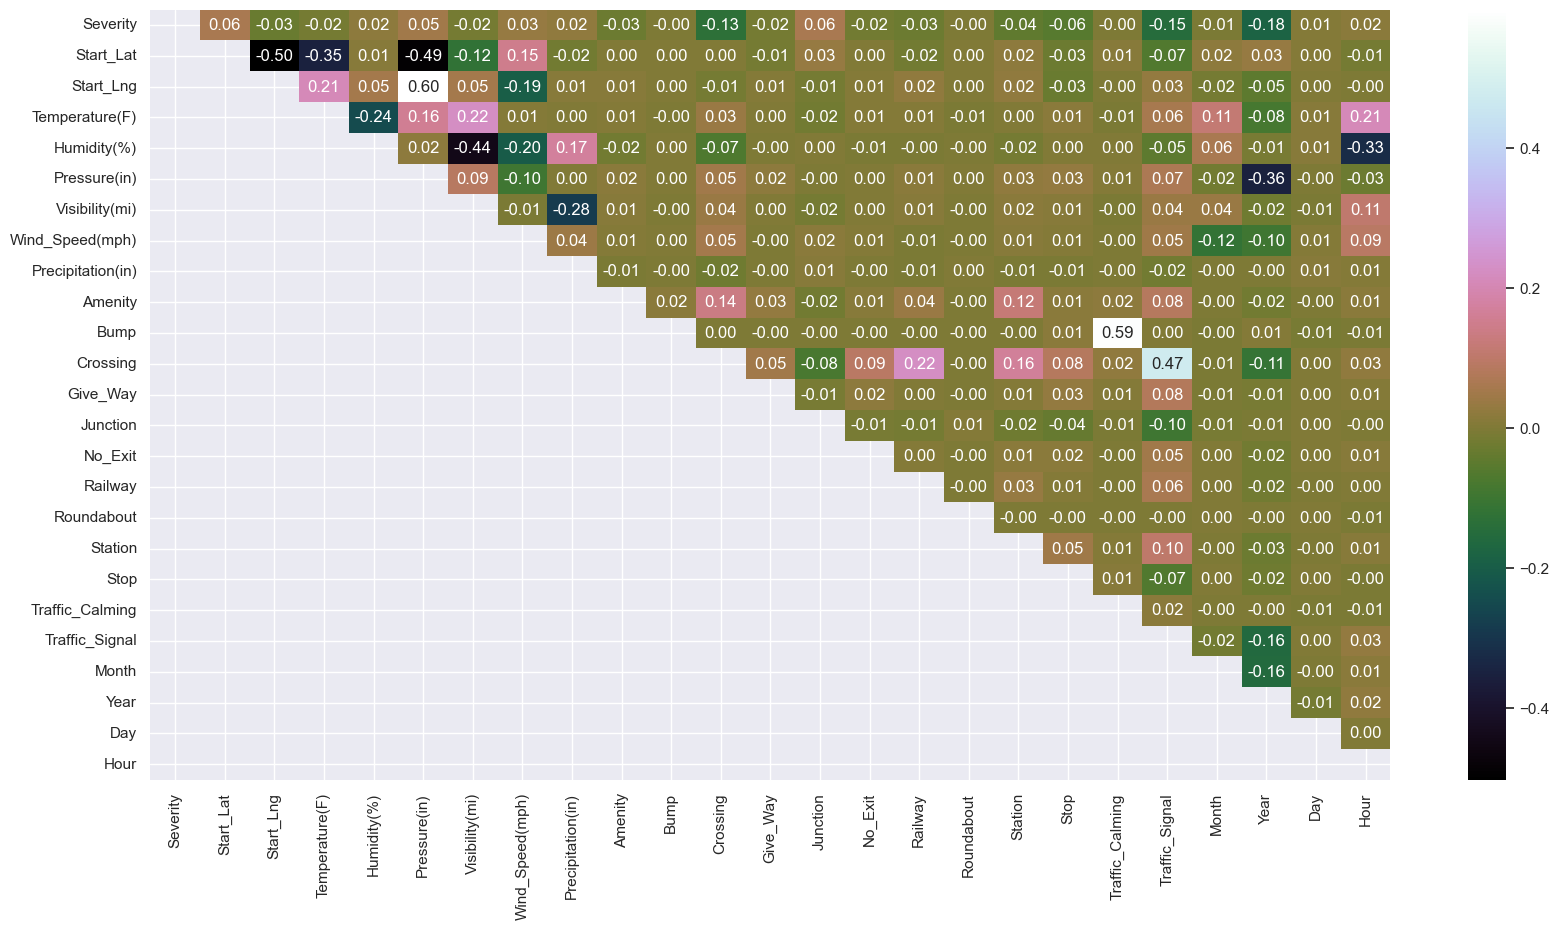

In [35]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.heatmap(new_df_rural1.corr(),mask=np.tril(new_df_rural1.corr()),annot=True,cmap='cubehelix',fmt=".2f")

We notice that severity has the most correlation between Crossing, Traffic Signal and the year, while other factors are weakly correlated with it.

## Preparing the data for Model building

### Removing skewness 

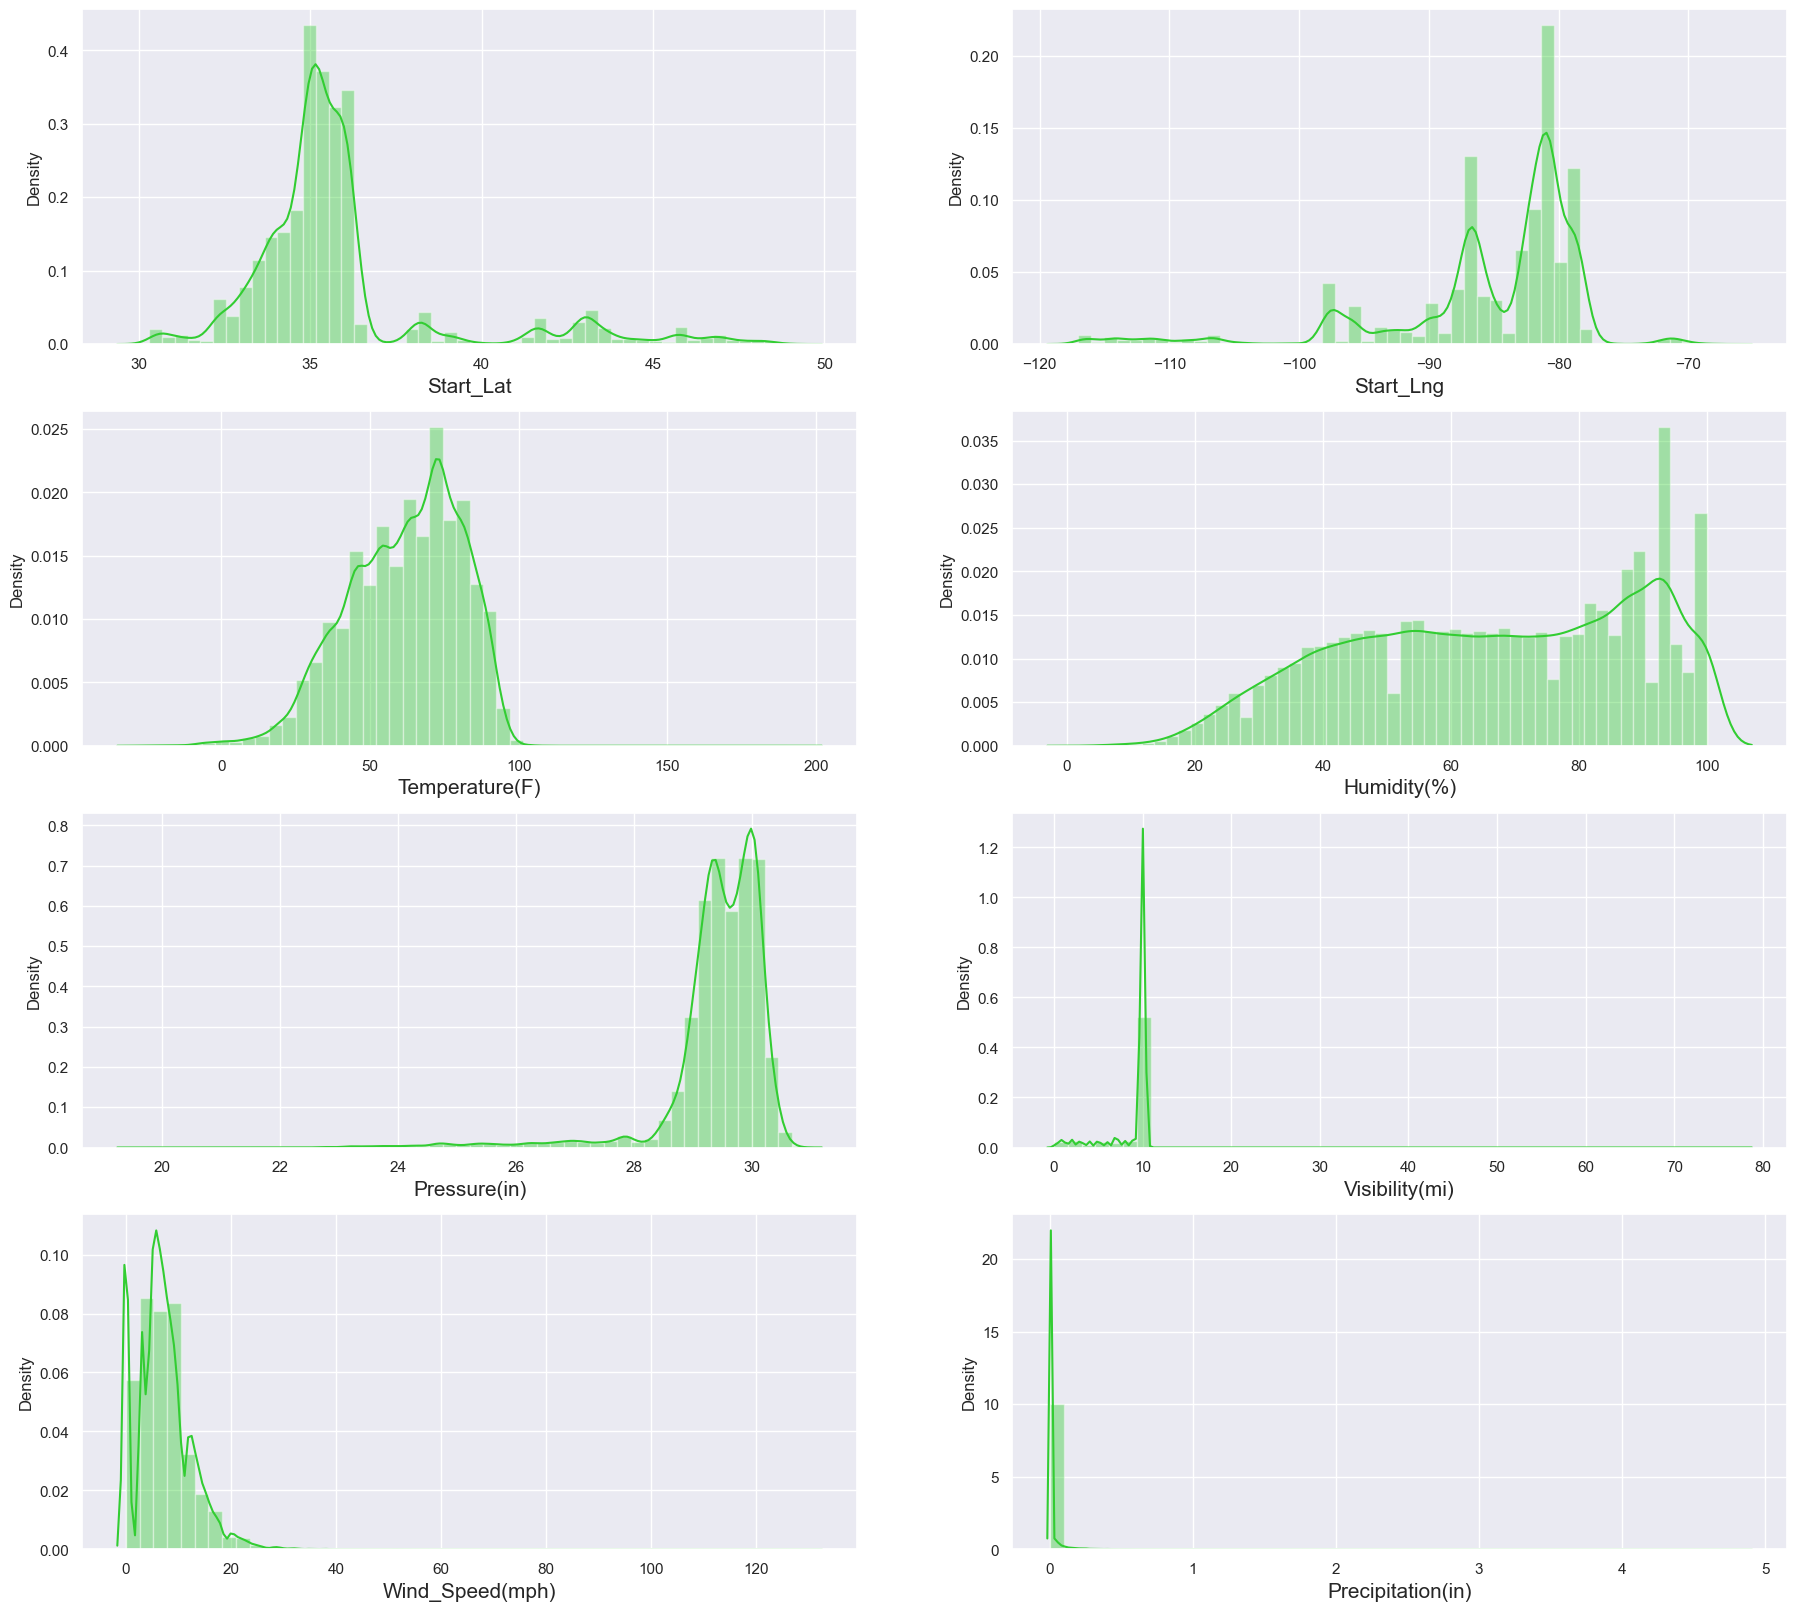

Start_Lat             2.081155
Start_Lng            -1.937148
Temperature(F)       -0.505799
Humidity(%)          -0.248345
Pressure(in)         -3.359988
Visibility(mi)       -1.957046
Wind_Speed(mph)       1.180513
Precipitation(in)    23.106579
dtype: float64

In [36]:
#Finding skewness of numerical columns
plt.figure(figsize=(22,20))
p=1
for i in float_cols:
    if p<=8:
        ax=plt.subplot(4,2,p)
        sns.distplot(new_df_rural1[i],  color="limegreen", kde= True)
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()
new_df_rural1[float_cols].skew()

In [37]:
from scipy.stats import yeojohnson
for i in float_cols[2:]:
    if new_df_rural1[i].skew()>= np.abs(0.7):
        new_df_rural1[i], _ = yeojohnson(new_df_rural1[i])

In [38]:
new_df_rural1[float_cols].skew()

Start_Lat            2.081155
Start_Lng           -1.937148
Temperature(F)      -0.505799
Humidity(%)         -0.248345
Pressure(in)        -3.359988
Visibility(mi)      -1.957046
Wind_Speed(mph)     -0.062545
Precipitation(in)    2.959281
dtype: float64

As we can see skewness is very much removed from the data

### Checking for outliers

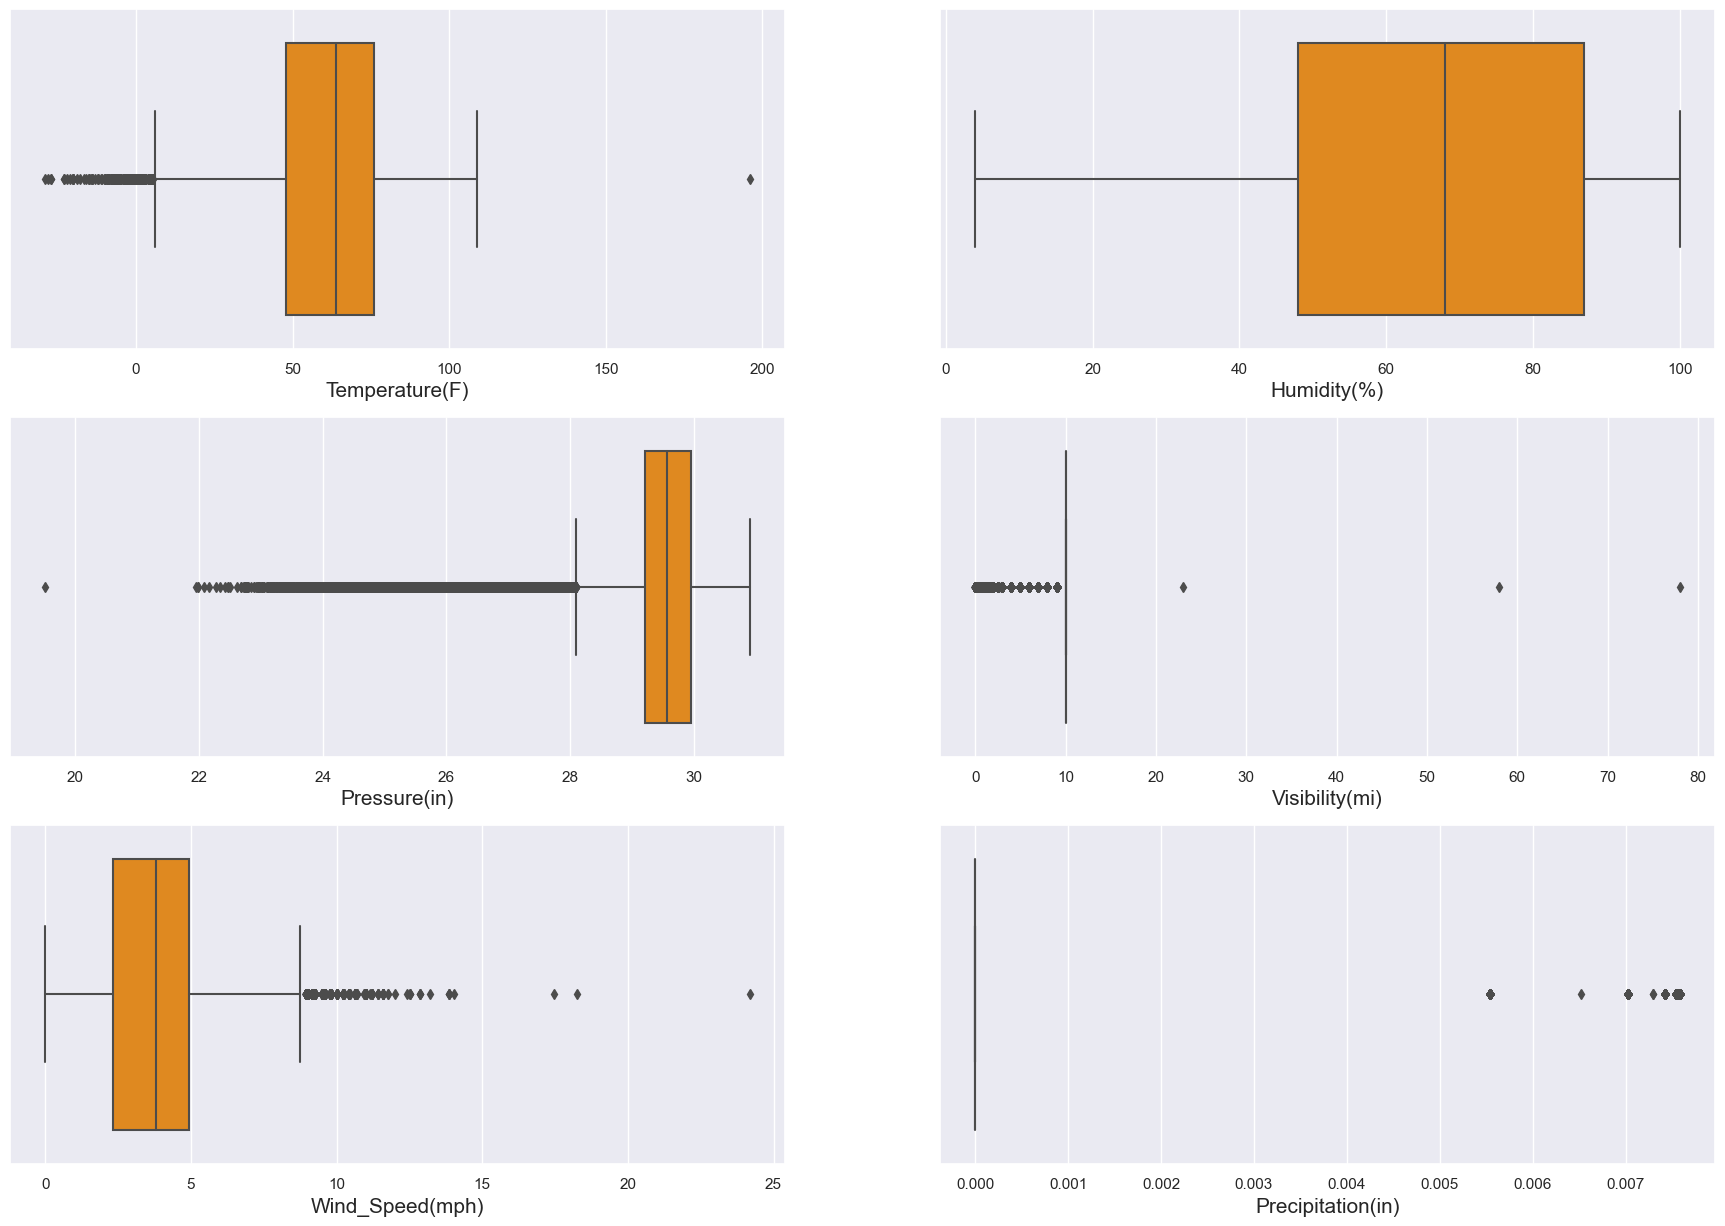

In [39]:
plt.figure(figsize=(22,15))
p=1
for i in float_cols[2:]:
    if p<=8:
        ax=plt.subplot(3,2,p)
        sns.boxplot(x=new_df_rural1[i],color='darkorange')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()

From aboe we see that there are many outliers present in our dataset but we wont be remoing them as these outliers may be giving us important information about the accidents. For example- High percipitation levels may be the reason for high severity of accidents.

### Encoding the categorical columns


In [40]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [41]:
for i in obj_cols:
    new_df_rural1[i]=oe.fit_transform(new_df_rural1[i].values.reshape(-1,1))
new_df_rural1.head()

,Severity,Start_Lat,Start_Lng,City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Year,Day,Hour
11,2,47.258259,-115.052916,1977.0,7.0,13.0,84.0,24.08,10.0,17.0,...,False,False,1.0,1.0,1.0,1.0,2,2022,1,4
12,2,34.720150,-86.616592,1100.0,0.0,85.0,65.0,29.39,10.0,11.0,...,False,True,0.0,0.0,0.0,0.0,7,2020,16,11
20,3,35.753944,-78.635696,1859.0,8.0,43.0,40.0,30.52,10.0,7.0,...,False,False,0.0,0.0,0.0,0.0,1,2018,25,11
22,2,34.651295,-86.816582,1357.0,0.0,64.0,75.0,29.24,10.0,0.0,...,False,False,0.0,0.0,0.0,0.0,3,2022,16,15
23,2,34.037140,-81.090858,462.0,13.0,62.0,93.0,29.69,8.0,2.0,...,False,True,0.0,0.0,0.0,0.0,3,2022,16,18


We have encoded the data for further use.

### Standard Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=new_df_rural1.drop(['Severity'],axis=1) #Dropping the severity column as it is our target variable
y=new_df_rural1['Severity']

In [43]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,Start_Lat,Start_Lng,City,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,Year,Day,Hour
0,3.878024,-3.984041,1.151191,-0.643908,-2.590175,0.788293,-6.029141,0.407293,1.039120,-0.745393,...,-0.023675,-0.462262,1.637299,1.848634,2.142906,2.444550,-1.303098,1.146909,-1.694895,-1.659289
1,-0.380038,-0.198819,-0.109907,-2.133828,1.232437,-0.063877,-0.047724,0.407293,0.161877,0.124005,...,-0.023675,2.163276,-0.610762,-0.540940,-0.466656,-0.409073,0.085668,-0.041523,0.036052,-0.317661
2,-0.028952,0.863536,0.981511,-0.431062,-0.997420,-1.185155,1.225158,0.407293,-0.422952,0.105143,...,-0.023675,-0.462262,-0.610762,-0.540940,-0.466656,-0.409073,-1.580851,-1.229954,1.074620,-0.317661
3,-0.403422,-0.225440,0.259651,-2.133828,0.117508,0.384634,-0.216690,0.407293,-1.446403,-1.752533,...,-0.023675,-0.462262,-0.610762,-0.540940,-0.466656,-0.409073,-1.025344,1.146909,0.036052,0.448984
4,-0.611995,0.536724,-1.027331,0.633166,0.011325,1.191953,0.290209,-0.427654,-1.153988,-0.745393,...,-0.023675,2.163276,-0.610762,-0.540940,-0.466656,-0.409073,-1.025344,1.146909,0.036052,1.023967


We have scaled the data for a robust model preparation.

### Feature Selection

We will be finding the best features for our model selection and will trim the not so neccessary columns as they will not be helping us in maing a good model and will just result in multicollinearity or make the model very complex and thus decreasing the overall performance of our model 

In [44]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [45]:
sfm=SelectFromModel(Lasso(alpha=0.005,random_state=0))
sfm.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [46]:
sfm.get_support()

array([ True,  True,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True,  True, False,  True])

In [47]:
sf=x.columns[(sfm.get_support())]
sf
print('Total Features=',new_df_rural1.shape[1])
print('Selected Features=',len(sf))
print('Trimmed features=',new_df_rural1.shape[1]-len(sf))
sf

Total Features= 33
Selected Features= 14
Trimmed features= 19


Index(['Start_Lat', 'Start_Lng', 'City', 'State', 'Pressure(in)',
       'Precipitation(in)', 'Crossing', 'Junction', 'Station', 'Stop',
       'Traffic_Signal', 'Month', 'Year', 'Hour'],
      dtype='object')

So these will be our best features for our model building.

In [48]:
x=x[sf]
x

,Start_Lat,Start_Lng,City,State,Pressure(in),Precipitation(in),Crossing,Junction,Station,Stop,Traffic_Signal,Month,Year,Hour
0,3.878024,-3.984041,1.151191,-0.643908,-6.029141,-0.310748,-0.390175,-0.22017,-0.123053,-0.172734,-0.462262,-1.303098,1.146909,-1.659289
1,-0.380038,-0.198819,-0.109907,-2.133828,-0.047724,-0.310748,-0.390175,-0.22017,-0.123053,-0.172734,2.163276,0.085668,-0.041523,-0.317661
2,-0.028952,0.863536,0.981511,-0.431062,1.225158,-0.310748,-0.390175,-0.22017,-0.123053,-0.172734,-0.462262,-1.580851,-1.229954,-0.317661
3,-0.403422,-0.225440,0.259651,-2.133828,-0.216690,-0.310748,-0.390175,-0.22017,-0.123053,-0.172734,-0.462262,-1.025344,1.146909,0.448984
4,-0.611995,0.536724,-1.027331,0.633166,0.290209,3.489963,2.562952,-0.22017,-0.123053,-0.172734,2.163276,-1.025344,1.146909,1.023967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76757,-0.195756,0.568343,-1.120799,-0.431062,1.213893,-0.310748,-0.390175,-0.22017,-0.123053,-0.172734,-0.462262,0.918928,-1.824170,-0.126000
76758,-1.147339,-0.142732,1.788211,-2.133828,0.447912,-0.310748,-0.390175,-0.22017,-0.123053,-0.172734,-0.462262,0.085668,1.146909,-1.084305
76759,-0.221437,0.565363,-1.120799,-0.431062,-0.013931,-0.310748,-0.390175,-0.22017,-0.123053,-0.172734,-0.462262,-0.747591,-0.635739,-0.892644
76760,0.072919,-0.236365,0.581756,1.058858,0.155036,-0.310748,-0.390175,-0.22017,-0.123053,-0.172734,-0.462262,-1.303098,0.552693,0.640645


### Balancing the data

As we know that our data is ery much imbalanced as most of the cases are of level 2 severity so we will be balancing the data first so there is no biasness which will in turn increase the model performance.

In [49]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x,y=os.fit_resample(x,y)
y.value_counts()

2    63924
3    63924
1    63924
4    63924
Name: Severity, dtype: int64

We can see our data is balanced now, we will move on to model building now.

## Model Building

In [4]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier()]

In [5]:
#selecting the random state as 0 as we selected the best features usng it
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=0)

NameError: name 'x' is not defined

In [53]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','\n','Accuracy score is: ',accuracy_score(y_test,predm))N
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    print('*'*80)

 For GaussianNB()  
 Accuracy score is:  0.4779894875164258
Cross Validation Score= 0.4744071053195459 


 Confusion matrix: 
 [[10204   281  4755   710]
 [ 1950  2959  9305  1696]
 [  305   514 14365   834]
 [  865   678 11476  3027]]

 Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.64      0.70     15950
           2       0.67      0.19      0.29     15910
           3       0.36      0.90      0.51     16018
           4       0.48      0.19      0.27     16046

    accuracy                           0.48     63924
   macro avg       0.57      0.48      0.44     63924
weighted avg       0.57      0.48      0.44     63924

********************************************************************************
 For LogisticRegression()  
 Accuracy score is:  0.51077842437895
Cross Validation Score= 0.5113572420572231 


 Confusion matrix: 
 [[11981   822  1135  2012]
 [ 4740  4364  3705  3101]
 [  985  1631 10184  3218]
 [ 3846

From our results we can see that **Random Forest Classifier is working with the most accuracy of 94% on seen and unseen data as well**, which can be confirmed by the cross validation score. As it is already working with a good accuracy , Hyperparameter Tuning is not needed. 

### Plotting ROC Curve

As our target variable is multiclass, plotting roc curve is not possible so we will be plotting the confusion matrix only.

### Plotting Confusion Matrix

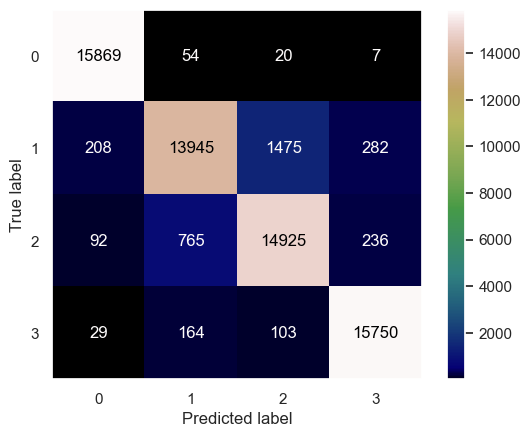

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='gist_earth')
plt.grid(False)

From our confusion matrix we can clearly see how our model has performed by showing the - true positives (correctly predicted positive instances), true negatives (correctly predicted negative instances), false positives (incorrectly predicted positive instances), and false negatives (incorrectly predicted negative instances).

### Saving the model

In [58]:
import joblib
joblib.dump(fmodel,'Analysis_of_rural_road_infra.obj')

['Analysis_of_rural_road_infra.obj']

### Results

In [60]:
rdf=pd.DataFrame({'Actual Values': y_test, 'Predcited Values':pred})
rdf

,Actual Values,Predcited Values
218072,4,4
115977,1,1
10826,3,2
105816,1,1
177560,3,3
...,...,...
137331,1,2
218502,4,4
228233,4,4
252753,4,4


# Safety Improvement Recommendations As Per Our Findings

1. Elevating Road Infrastructure:

a. I-40 W Street Overhaul:
- Dive deep into the intricacies of I-40 W Street to identify and address accident hotspots.
- Illuminate the roadway with state-of-the-art signage, revamped road markings, and enhanced lighting.
- Explore potential expansion or lane adjustments to accommodate burgeoning traffic loads.

b. Revitalizing City Charlotte:
- Propel Charlotte into a safety-first era with upgraded intersections and cutting-edge traffic control.
- Undertake targeted road design enhancements to eradicate specific accident-prone zones.
- Forge collaborations with local authorities to streamline traffic flow and alleviate congestion.

c. Mecklenburg County Restoration:
- Initiate a robust maintenance campaign for Mecklenburg County, eradicating potholes and surface irregularities.
- Prioritize pedestrian safety through the implementation of well-lit crosswalks and universally accessible pathways.

d. Statewide Safety Renaissance in South Carolina:
- Foster partnerships with state agencies to spearhead impactful safety campaigns and implement advanced traffic management systems.
- Evaluate the potential deployment of additional traffic calming measures on high-accident thoroughfares.

2. Temporal Precision in Safety Measures:

a. Daytime Vigilance:
- Enhance daytime safety with heightened law enforcement presence in accident-prone areas.
- Propagate awareness campaigns elucidating safe daytime driving practices.

b. Navigating Seasonal Challenges (November to January):
- Bolster winter road maintenance efforts, focusing on prompt ice and snow removal.
- Disseminate comprehensive public awareness campaigns outlining meticulous winter driving precautions.

c. Strategic Time-of-Day Traffic Management (4-5 PM and 7-8 AM):
- Implement precision traffic management during peak hours, including adaptive signal timings.
- Investigate the feasibility of staggered work hours to mitigate rush-hour bottlenecks.

3. Weather-Proofing Roadways:

a. Calm Wind and Fair Weather Fortification:
- Institute continuous weather monitoring to preempt potential hazards.
- Intensify road maintenance during fair weather conditions to preempt latent safety concerns.

b. Visibility and Precipitation Preparedness:
- Heighten road visibility through meticulous maintenance of signs and road markings.
- Ponder the implementation of real-time communication systems to forewarn drivers about compromised visibility and adverse weather conditions.

4. Tailored Traffic Control Techniques/Features:

a. Rural Renaissance:
- Unleash a targeted program to amplify traffic control features in rural landscapes.
- Assess the feasibility of incorporating additional features contingent on the identified accident patterns.

b. Effective Features' Magnitude (Bump, Roundabout, Traffic Calming):
- Prioritize the deployment of efficacious features in accident-prone locales.
- Undertake robust awareness campaigns elucidating the myriad benefits of these features.

c. Junctions:
- Conduct a meticulous analysis of junctions contributing to elevated severity accidents.
- Implement judicious safety enhancements, encompassing optimized traffic signal configurations and heightened signage.

5. Geostrategic Safety Focus:

a. South Eastern States Synergy:
- Engage in collaborative ventures with regional authorities to fashion targeted safety initiatives in high-impact states.
- Allocate resources to amplify infrastructure in pinpointed hotspots.

b. Microanalysis of Local Hotspots (Chicago, Oklahoma, South Carolina):
- Undertake localized safety assessments, decoding the intricacies of each hotspot.
- Implement bespoke safety measures tailored to the unique traffic patterns and contextual conditions.

In Conclusion:

This isn't merely a set of recommendations; it's a paradigm shift towards a safer, more vibrant, and human-centric roadway experience. As we embark on this transformative journey, meticulous monitoring and agile adjustments will be the cornerstone of our commitment to creating roads that are not just safe but exude a distinctly human touch. Together, we forge ahead to shape a future where every journey is a testament to safety, vitality, and community harmony.

1. **Area Wise Recommendation-**

a. I-40 W Street Scrutiny:
- Delve into the specifics of I-40 W Street for accident-prone zones.
- Lighting the roadway with improved road markings, and street lamps.
- Explore potential lane adjustments or expansions to accommodate growing traffic demands.

b. Charlotte's Traffic Control:
- Charlotte needs upgraded intersections and advanced traffic control.
- Considering strategic road design enhancements to eradicate identified accident hotspots.
- Collaborate with the community to streamline traffic flow and decrease congestion.

c. Mecklenburg County :
- Initiate a robust maintenance campaign to address road irregularities in Mecklenburg County.
- Prioritize pedestrian safety with well-lit crosswalks and universally accessible pathways.

d. South Carolina Safety :
- Collaborate with South Carolina agencies for impactful safety campaigns.
- Evaluate the feasibility of additional traffic calming measures on accident-prone routes.

2. **Time-Centric Safety Measures**:

a. Daytime Patrolling:
- Increase law enforcement presence during daylight hours.
- Disseminate awareness campaigns emphasizing safe daytime driving practices.

b. Seasonal Problems (November to January):
- Intensify winter road maintenance, focusing on timely snow removal, better lighting and spreading awareness about importance of fog lights.
- Launch public awareness campaigns on winter driving precautions.

c.Rush Hour Management (4-5 PM and 7-8 AM):
- Implement targeted traffic management strategies during peak hours.
- Investigate flexible work hour possibilities to mitigate rush-hour congestion.

3. **Weather-Responsive Road Care:**

a.During Calm Weather :
- Maintain continuous weather monitoring for potential hazards.
- Enhance road maintenance during fair weather conditions to prevent latent safety concerns.

b. Visibility and Precipitation precautions:
- Improve road visibility through maintenance of signs and road markings.
- Explore real-time communication systems to warn drivers about compromised visibility and adverse weather conditions.

4. **Traffic Control Strategies:**

a. Rural Road reconstruction:
- Launch a targeted program to amplify traffic control features in rural areas.
- Assess the need for additional features based on identified accident patterns.

b. Best performing features (Bump, Roundabout, Traffic Calming):
- Prioritize the deployment of these effective features in accident-prone zones.
- Conduct awareness campaigns about the benefits of these features.

c. Junction scrutiny:
- Conduct a thorough analysis of junctions contributing to elevated severity accidents.
- Implement safety enhancements, including optimized traffic signals.

5. **Geographical Safety Focus:**

a. South Eastern States Collaboration:
- Collaborative initiatives with regional authorities for targeted safety measures.
- Allocate resources to amplify infrastructure in pinpointed hotspots.

b. Microanalysis of Local Hotspots (Chicago, Oklahoma, South Carolina):
- Undertake localized safety assessments to understand the unique challenges of each hotspot.
- Implement tailored safety measures, considering local traffic patterns and contextual conditions.

In Conclusion:

It's a strategic roadmap towards safer roads and smarter communities. As we implement these measures, we'll monitor and adapt to ensure effectiveness. Let's create roadways that not only prioritize safety but also foster a connected and insightful community. Together, let's navigate towards a future where every journey is secure, intelligent, and community-driven.

In [4]:
import joblib
fmodel=joblib.load('Analysis_of_rural_road_infra.obj')

In [5]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
oe=OrdinalEncoder()
ss=StandardScaler()

In [11]:
def predict():
    a=int(input("Lat:"))
    b=int(input("Long:"))
    c=input("City:")
    d=input("State:")
    e=int(input("Pressure(in):"))
    f=int(input("Precipitation(in):"))
    g=input("Crossing:")
    h=input("Junction:")
    i=input("Station:")
    j=input("Stop:")
    k=input("Traffic_Signal:")
    l=int(input("Month:"))
    m=int(input("Year:"))
    n=int(input("Hour:"))
    array=np.array([a,b,c,d,e,f,g,h,i,j,k,l,m,n])
    reshaped=array.reshape(1,-1)
    encoding=oe.fit_transform(reshaped)
    sscaling=ss.fit_transform(encoding)
    result=fmodel.predict(sscaling)
    print('Severity:', result[0])

In [14]:
predict()

Lat:47
Long:-115
City:Saint Regis
State:MT
Pressure(in):24
Precipitation(in):0
Crossing:False
Junction:True
Station:False
Stop:False
Traffic_Signal:False
Month:1
Year:2022
Hour:4
Severity: 1
